* Board Layout
Red, Purple, Yellow, Blue, Orange, Green

Peppermint Pass = 60 Ssquares ahead = first blue
Fastest = Double Greens = 12 squares per draw

Best play is double of your color = 12 squares
Worst play is 1 square ahead of you

64 Cards - Confirmed on site

6 Special
Red - 6xDouble, 4x Single = 10
Yellow - 6xDouble, 4x Single = 10
Blue - 6x Double, 4x Single = 10
Purple - 6x Double, 4x Single = 10
Green - 6x Double, 3x Single = 9
Orange - 6xDouble, 3x Single = 9

https://datagenetics.com/blog/december12011/index.html

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

boardColorList="RPYBOG"

gameId = []
winResults = []
gameTurns = []
minStrategyDistance = []
maxStrategyDistance = []
passWasFound = []

In [2]:
deck = []

def buildDeck():
    for i in range(0,6):
            deck.append("R")
            deck.append("Y")
            deck.append("B")
            deck.append("P")
            deck.append("G")
            deck.append("O")
    
    for i in range(0,3):
            deck.append("RR")
            deck.append("YY")
            deck.append("BB")
            deck.append("PP")
        
    for i in range(0,2):
            deck.append("GG")
            deck.append("OO")
    
    #deck.sort()
    #print(deck)
    #print("Deck built of size {}".format(len(deck)))
    random.shuffle(deck)


In [3]:
def calculateDistanceForCard(currentColorSquare, card):
    
    # Take a double card over a single card
    # Take the card with the greatest distance

    if card == "":
        print("Invalid value for card")
        return
    
    # Drew same solor 
    if currentColorSquare == "" :
        distance = boardColorList.index(card[0])+1
        # Drew double same color
        if len(card) == 2:
            distance = distance + len(boardColorList)

    if card[0] == currentColorSquare:
        distance = len(boardColorList)
        # Drew double same color
        if len(card) == 2:
            distance = distance + len(boardColorList)
    else :
        distance = boardColorList.index(card[0])+1 - boardColorList.index(currentColorSquare)
        if len(card) == 2 :
            distance = distance + len(boardColorList)

    return distance
    

In [4]:
def playGame(gameNumber) :

    print("==================================")
    print("Playing Game {}".format(gameNumber))
    print("==================================")
    
    maxStrategyDistanceTravelled = 0
    minStrategyDistanceTravelled = 0
    maxStrategyBoardColor = ""
    minStrategyBoardColor = ""
    
    turnNumber = 1
    peppermintPassDistance = 60
    missedPeppermintPassDistance = boardColorList.index("B") + 1

    currentSquareColor = ""
    peppermintPassFound = False

    while (maxStrategyDistanceTravelled < peppermintPassDistance) and (minStrategyDistanceTravelled < missedPeppermintPassDistance) and not (peppermintPassFound) :
        print("Turn: {}, MIN color {}, traveled {}, MAX color {} traveled {}".format(turnNumber, minStrategyBoardColor, minStrategyDistanceTravelled, maxStrategyBoardColor, maxStrategyDistanceTravelled)) 
        maxTurnDistance = 0
        maxDistanceCardSelection = ""
        minTurnDistance = 100
        minDistanceCardSelection = ""
        cardsForTurn = []
        
        for drawCard in range(0,2):
            
            drawnCard = deck.pop()
            cardsForTurn.append(drawnCard)
            maxStrategyCardDistance = calculateDistanceForCard(currentSquareColor, drawnCard)
            minStrategyCardDistance = calculateDistanceForCard(currentSquareColor, drawnCard)
            
            if drawnCard == "B":
                print("Peppermint Pass drawn on {}".format(turnNumber))
                peppermintPassFound = True
                minStrategyDistanceTravelled = peppermintPassDistance
            if maxStrategyCardDistance > maxTurnDistance :
                maxTurnDistance = maxStrategyCardDistance
                maxDistanceCardSelection = drawnCard
                maxStrategyBoardColor=drawnCard[0]
            if minStrategyCardDistance < minTurnDistance :
                minTurnDistance = minStrategyCardDistance
                minDistanceCardSelection = drawnCard
                minStrategyBoardColor=drawnCard[0]

        maxStrategyDistanceTravelled += maxTurnDistance 
        minStrategyDistanceTravelled += minTurnDistance
        print("   Cards drawn this turn {}".format(cardsForTurn))
        print("   Max traveled = {}, Card Selected {}".format(maxStrategyDistanceTravelled, maxDistanceCardSelection))
        print("   Min traveled = {}, Card Selected {}".format(minStrategyDistanceTravelled, minDistanceCardSelection))
        turnNumber+=1

    if peppermintPassFound and minStrategyDistanceTravelled > maxStrategyDistanceTravelled :
        print("Peppermint Pass found and WON - Max strategy distance - {}, Min strategy distance - {}".format(maxStrategyDistanceTravelled, minStrategyDistanceTravelled))
        winResults.append("Min Win")
    elif peppermintPassFound and maxStrategyDistanceTravelled > minStrategyDistanceTravelled :
        print("Peppermint Pass found and LOSS - Max strategy distance - {}, Min strategy distance - {}".format(maxStrategyDistanceTravelled, minStrategyDistanceTravelled))
        winResults.append("Max Win")
    else :
        print("Peppermint Pass not found and LOSS - Max strategy distance - {}, Min strategy distance - {}".format(maxStrategyDistanceTravelled, minStrategyDistanceTravelled))
        winResults.append("Max Win") 
    gameId.append(gameNumber)
    gameTurns.append(turnNumber)
    minStrategyDistance.append(minStrategyDistanceTravelled)
    maxStrategyDistance.append(maxStrategyDistanceTravelled)
    passWasFound.append(peppermintPassFound)
    
    gameNumber+= 1        

In [5]:
totalGames = 100

for game in range(1,totalGames):
    buildDeck()
    playGame(game)

Playing Game 1
Turn: 1, MIN color , traveled 0, MAX color  traveled 0
Peppermint Pass drawn on 1
   Cards drawn this turn ['P', 'B']
   Max traveled = 4, Card Selected B
   Min traveled = 62, Card Selected P
Peppermint Pass found and WON - Max strategy distance - 4, Min strategy distance - 62
Playing Game 2
Turn: 1, MIN color , traveled 0, MAX color  traveled 0
Peppermint Pass drawn on 1
   Cards drawn this turn ['R', 'B']
   Max traveled = 4, Card Selected B
   Min traveled = 61, Card Selected R
Peppermint Pass found and WON - Max strategy distance - 4, Min strategy distance - 61
Playing Game 3
Turn: 1, MIN color , traveled 0, MAX color  traveled 0
Peppermint Pass drawn on 1
   Cards drawn this turn ['B', 'O']
   Max traveled = 5, Card Selected O
   Min traveled = 64, Card Selected B
Peppermint Pass found and WON - Max strategy distance - 5, Min strategy distance - 64
Playing Game 4
Turn: 1, MIN color , traveled 0, MAX color  traveled 0
   Cards drawn this turn ['OO', 'P']
   Max trav

In [6]:
dataset = {    
    'gameId': gameId,
    'winResults': winResults,
    'gameTurns':gameTurns,
    'minStrategyDistance':minStrategyDistance,
    'maxStrategyDistance':maxStrategyDistance,
    'passWasFound':passWasFound
}

df = pd.DataFrame(dataset, index=gameId)

99
99
99
99
99
99


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 99
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gameId               99 non-null     int64 
 1   winResults           99 non-null     object
 2   gameTurns            99 non-null     int64 
 3   minStrategyDistance  99 non-null     int64 
 4   maxStrategyDistance  99 non-null     int64 
 5   passWasFound         99 non-null     bool  
dtypes: bool(1), int64(4), object(1)
memory usage: 4.7+ KB


In [8]:
df.describe()

,gameId,gameTurns,minStrategyDistance,maxStrategyDistance
count,99.000000,99.000000,99.000000,99.000000
mean,50.000000,2.707071,23.474747,11.414141
std,28.722813,0.785747,26.136745,5.929880
min,1.000000,2.000000,4.000000,4.000000
25%,25.500000,2.000000,5.000000,8.000000
50%,50.000000,3.000000,7.000000,10.000000
75%,74.500000,3.000000,61.000000,13.000000
max,99.000000,5.000000,64.000000,30.000000


<AxesSubplot:xlabel='winResults', ylabel='gameId'>

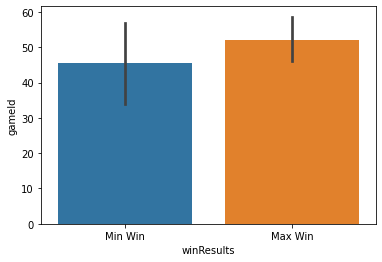

In [9]:
sns.barplot(data=df, y="gameId", x="winResults")

<AxesSubplot:xlabel='gameTurns', ylabel='Density'>

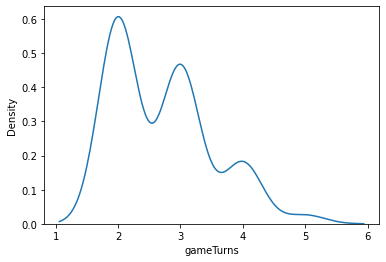

In [14]:
sns.kdeplot(data=df, x="gameTurns")

<AxesSubplot:xlabel='gameTurns', ylabel='maxStrategyDistance'>

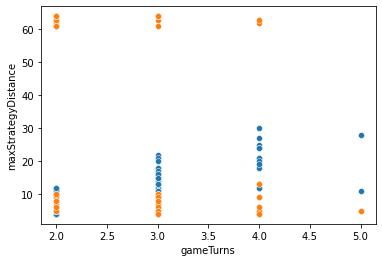

In [17]:
sns.scatterplot(data=df, x="gameTurns", y="maxStrategyDistance")
sns.scatterplot(data=df, x="gameTurns", y="minStrategyDistance")
